# Environment

In [60]:
import os
import sys
import numpy as np
import pandas as pd

# Set working directory
# work_dir = '/home/michal.kubacki/Githubs/GeneScore/trimmed_Evaluation'
work_dir = 'D:/Github/GeneScore/trimmed_Evaluation'
# work_dir = '/mnt/d/Github/GeneScore/trimmed_Evaluation'
os.chdir(work_dir)

# Load environment variables from .env file
from dotenv import load_dotenv

# Explicitly specify the path to the .env file
env_path = os.path.join(work_dir, '.env')
load_dotenv(env_path)

# Get environment variables with error handling
project_functions_path = os.getenv('PROJECT_FUNCTIONS_PATH')
if not project_functions_path:
    raise ValueError("PROJECT_FUNCTIONS_PATH environment variable not found in .env file")

print(f"Using PROJECT_FUNCTIONS_PATH: {project_functions_path}")
sys.path.insert(0, project_functions_path)

import evaluated_helpers

import importlib
importlib.reload(evaluated_helpers)

from evaluated_helpers import *

Using PROJECT_FUNCTIONS_PATH: D:/Github/GeneScore/project_functions


In [61]:
base_path = os.getenv('BASE_PATH')
# gene_set = "L2-3_CUX2"
gene_set = "all_ex"
cell_type = "L2-3_CUX2"

# Load Gene Sets Data 

In [62]:
gere_sets_dict_celloracle, gene_sets_dict_cell_type_first_celloracle = load_GRNs_gene_sets(root_dir=base_path, gene_set_list = [gene_set], weights_list="scores_grn_all_from_comb_run_new.csv")

loading data from: D:/Github/GeneScore/herring_minimal\all_ex\celloracle


# Analyse separately

In [63]:
goi = "RARA"
score = "coef_mean"

### Remove duplicates

In [64]:
print(gene_sets_dict_cell_type_first_celloracle[gene_set][cell_type].keys())
gois = gene_sets_dict_cell_type_first_celloracle[gene_set][cell_type].keys()

dict_keys(['AHR', 'ARNT', 'ARNT2', 'CLOCK', 'AR', 'NR1I2', 'NR1I3', 'NR3C1', 'NR3C2', 'ESR1', 'RARA', 'ESR2', 'THRB', 'THRA'])


In [65]:
data={key: gene_sets_dict_cell_type_first_celloracle[gene_set][cell_type][key]["targets"] for key in gois}
duplicates = print_number_of_duplicate_genes(data)

for AHR total duplicates: 49 out of 79
for ARNT total duplicates: 37 out of 65
for ARNT2 total duplicates: 33 out of 56
for CLOCK total duplicates: 43 out of 74
for AR total duplicates: 28 out of 54
for NR1I2 total duplicates: 19 out of 35
for NR1I3 total duplicates: 11 out of 22
for NR3C1 total duplicates: 38 out of 76
for NR3C2 total duplicates: 11 out of 21
for ESR1 total duplicates: 58 out of 95
for RARA total duplicates: 32 out of 61
for ESR2 total duplicates: 34 out of 63
for THRB total duplicates: 94 out of 163
for THRA total duplicates: 9 out of 14


In [66]:
if duplicates:
    gene_sets_dict_cell_type_first_celloracle = remove_duplicates_preserve_order_GRNs(gene_sets_dict_cell_type_first_celloracle)
    data={key: gene_sets_dict_cell_type_first_celloracle[gene_set][cell_type][key]["targets"] for key in gois}
    print_number_of_duplicate_genes(data)

for AHR no duplicates found
for ARNT no duplicates found
for ARNT2 no duplicates found
for CLOCK no duplicates found
for AR no duplicates found
for NR1I2 no duplicates found
for NR1I3 no duplicates found
for NR3C1 no duplicates found
for NR3C2 no duplicates found
for ESR1 no duplicates found
for RARA no duplicates found
for ESR2 no duplicates found
for THRB no duplicates found
for THRA no duplicates found


### Statistics

In [67]:
sets = list(gene_sets_dict_cell_type_first_celloracle.keys())
cell_types = list(gene_sets_dict_cell_type_first_celloracle[gene_set].keys())
scored_genes = list(gene_sets_dict_cell_type_first_celloracle[gene_set][cell_type].keys())
print(scored_genes)
print(len(gene_sets_dict_cell_type_first_celloracle[gene_set][cell_type][goi]['targets']))

['AHR', 'ARNT', 'ARNT2', 'CLOCK', 'AR', 'NR1I2', 'NR1I3', 'NR3C1', 'NR3C2', 'ESR1', 'RARA', 'ESR2', 'THRB', 'THRA']
29


In [68]:
for cell_type in cell_types:
    strings = [f"{scored_gene}: {len(gene_sets_dict_cell_type_first_celloracle[gene_set][cell_type][scored_gene]['targets'])}" for scored_gene in scored_genes]
    print(f'{cell_type}: {strings}') 


L2-3_CUX2: ['AHR: 30', 'ARNT: 28', 'ARNT2: 23', 'CLOCK: 31', 'AR: 26', 'NR1I2: 16', 'NR1I3: 11', 'NR3C1: 38', 'NR3C2: 10', 'ESR1: 37', 'RARA: 29', 'ESR2: 29', 'THRB: 69', 'THRA: 5']
L4_RORB: ['AHR: 17', 'ARNT: 15', 'ARNT2: 18', 'CLOCK: 23', 'AR: 39', 'NR1I2: 18', 'NR1I3: 4', 'NR3C1: 23', 'NR3C2: 12', 'ESR1: 15', 'RARA: 23', 'ESR2: 20', 'THRB: 83', 'THRA: 6']
L5-6_THEMIS: ['AHR: 18', 'ARNT: 20', 'ARNT2: 20', 'CLOCK: 13', 'AR: 48', 'NR1I2: 7', 'NR1I3: 6', 'NR3C1: 35', 'NR3C2: 10', 'ESR1: 49', 'RARA: 35', 'ESR2: 20', 'THRB: 85', 'THRA: 4']
L5-6_TLE4: ['AHR: 20', 'ARNT: 18', 'ARNT2: 27', 'CLOCK: 23', 'AR: 40', 'NR1I2: 3', 'NR1I3: 3', 'NR3C1: 40', 'NR3C2: 9', 'ESR1: 64', 'RARA: 50', 'ESR2: 17', 'THRB: 70', 'THRA: 6']
PN_dev: ['AHR: 26', 'ARNT: 30', 'ARNT2: 14', 'CLOCK: 30', 'AR: 61', 'NR1I2: 9', 'NR1I3: 2', 'NR3C1: 39', 'NR3C2: 6', 'ESR1: 42', 'RARA: 60', 'ESR2: 26', 'THRB: 74', 'THRA: 9']


### Heatmap

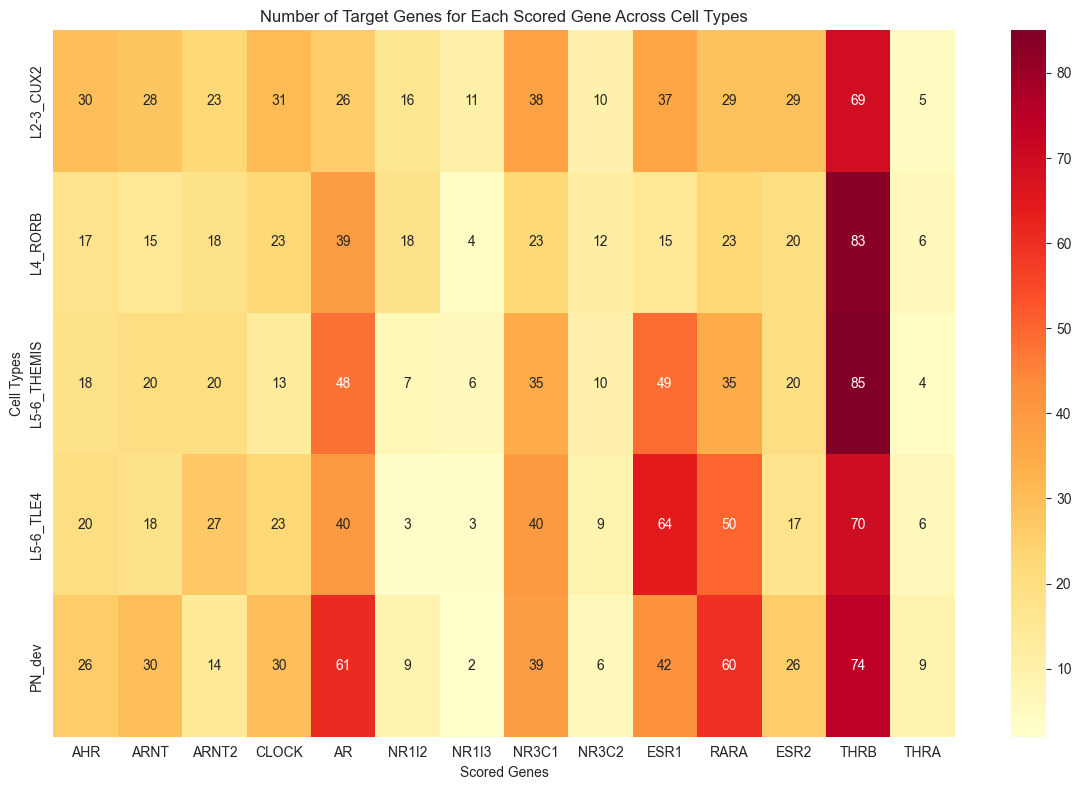

In [69]:
create_heatmap(gene_sets_dict_cell_type_first_celloracle, gene_set, scored_genes, cell_types)

### Venn diagrams


Shared genes between the sets:
Shared between RARA & THRB: {'PDE1C', 'ARHGEF26', 'FOXP1', 'KAZN'}
Shared between THRB & AR: {'SNTG1', 'CUX1'}


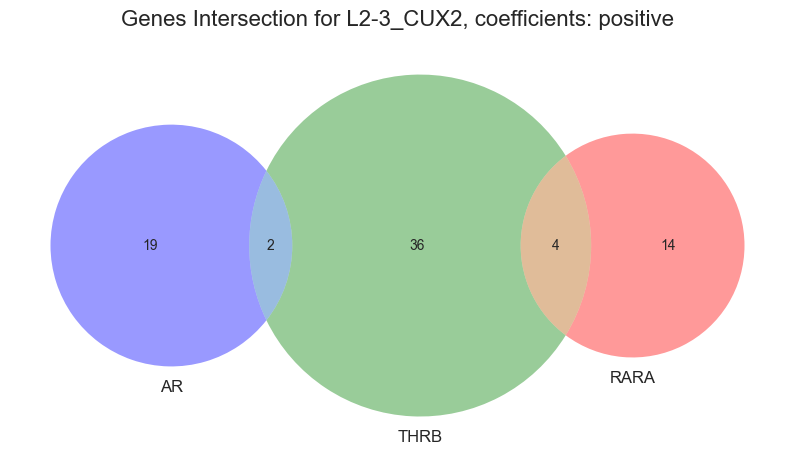

In [70]:
scored_genes=["RARA", "THRB", "AR"]
cell_type = "L2-3_CUX2"
analyze_gene_sets_gene_set(gene_sets_dict_cell_type_first_celloracle, gene_set, cell_type=cell_type, scored_genes=scored_genes, mode="positive", printouts=True)

D:\Github/GeneScore/project_functions\evaluated_helpers.py:621: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Marked Genes", title_fontsize=10, fontsize=8, loc='upper right', bbox_to_anchor=(1.25, 1))


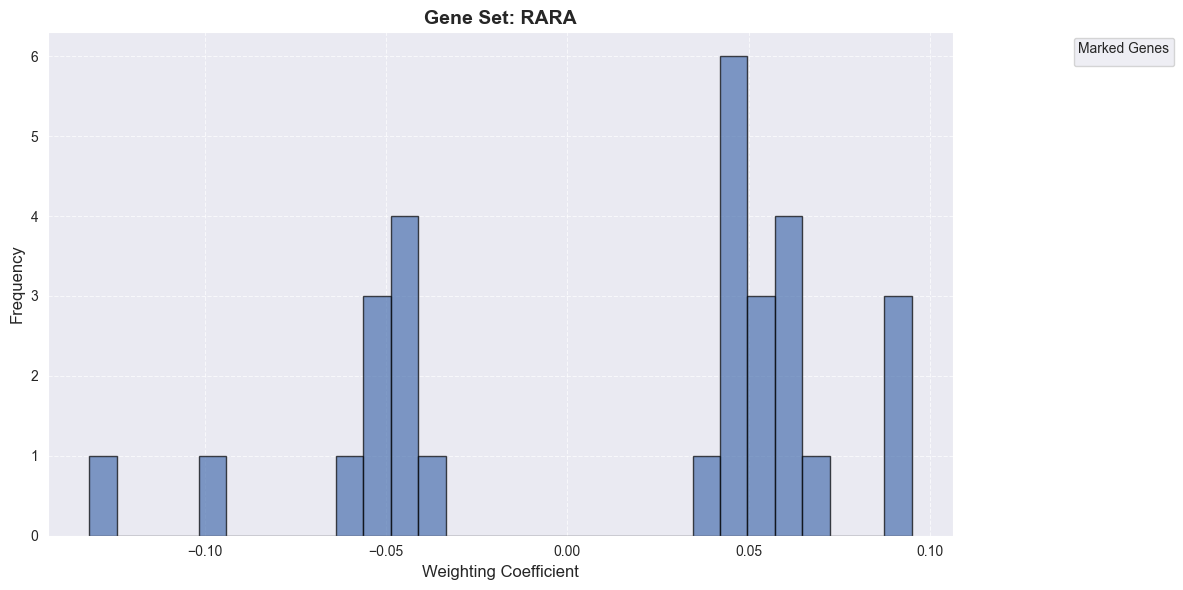

In [71]:
genes_to_mark = ['PAM', 'EPHA6', 'OXR1', 'RBFOX1', 'RASGRF2', 'CPVL']
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, gene_set, cell_type, goi, score="coef_mean", bins=30, genes_to_mark=genes_to_mark)

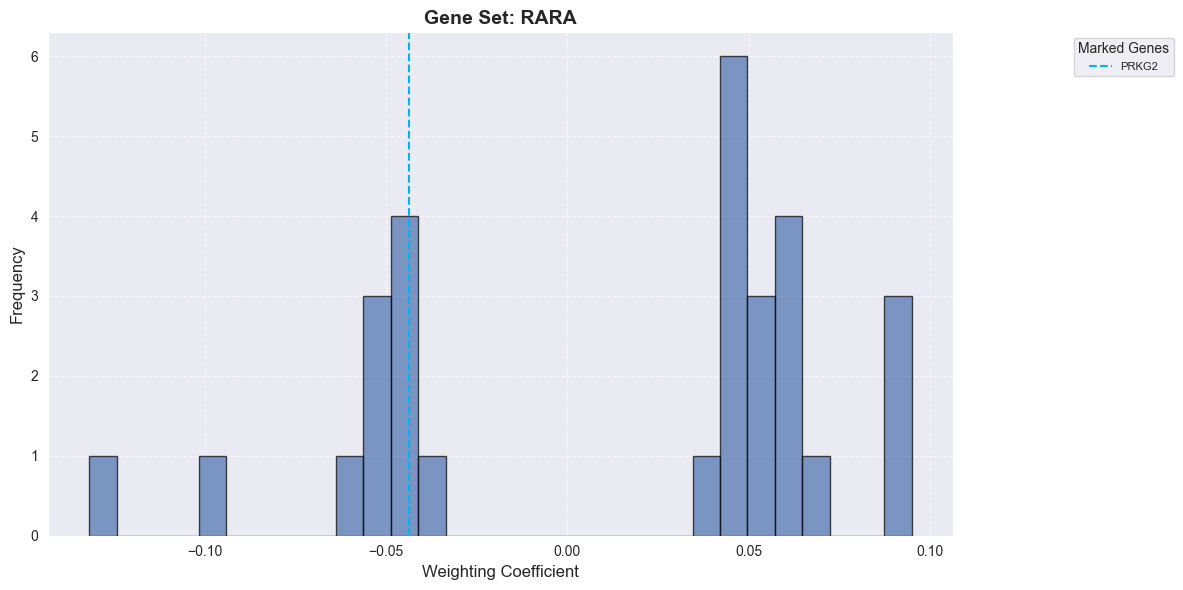

In [72]:
genes_to_mark = ['BDNF', 'PRKG2', 'KIRREL3', 'CUX1', 'UBB']
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, gene_set, cell_type, goi, score="coef_mean", bins=30, genes_to_mark=genes_to_mark)

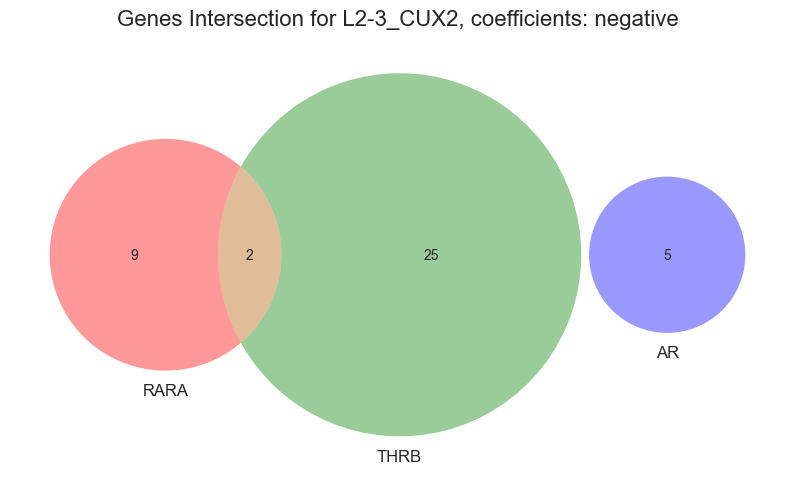

In [74]:
scored_genes=["RARA", "THRB", "AR"]
analyze_gene_sets_gene_set(gene_sets_dict_cell_type_first_celloracle, gene_set, cell_type, scored_genes=scored_genes, mode="negative")


Unique genes for each set:
L2-3_CUX2: {'LINC-PINT', 'RASGRF2', 'PHYHIPL'}
L4_RORB: {'ELMO1', 'PTPRZ1'}
L5-6_THEMIS: set()


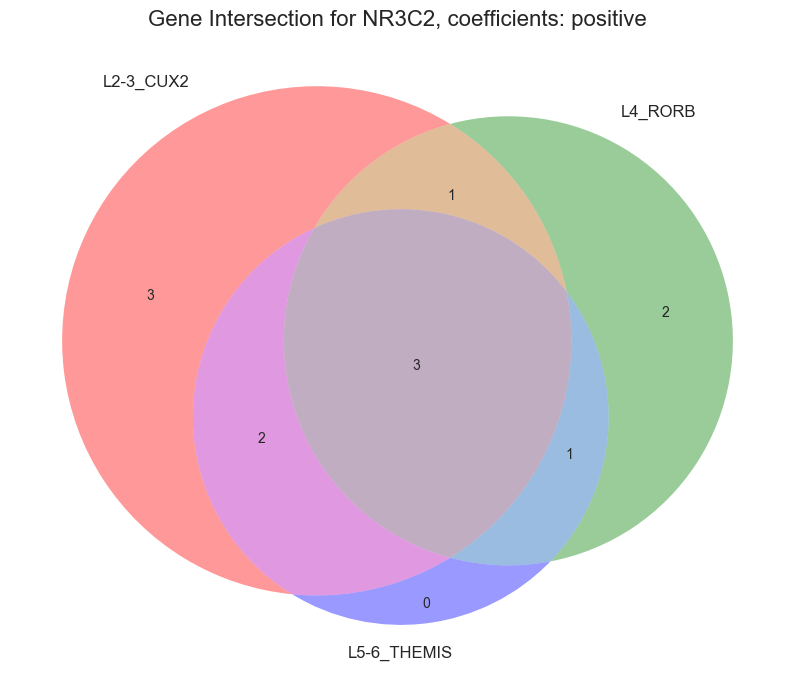

In [75]:
cell_types=["L2-3_CUX2", "L4_RORB", "L5-6_THEMIS"]
scored_gene="NR3C2"

analyze_gene_sets_cell_types(gene_sets_dict_cell_type_first_celloracle, gene_set, scored_gene, cell_types, mode = "positive", printouts=True)

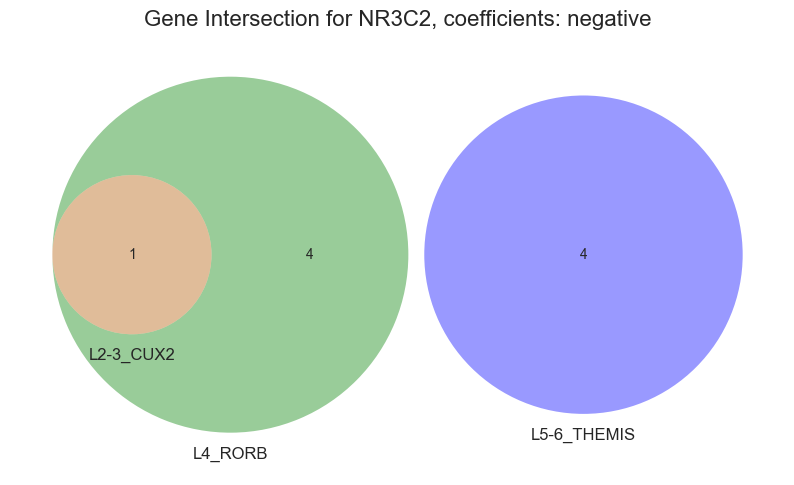

In [76]:
cell_types=["L2-3_CUX2", "L4_RORB", "L5-6_THEMIS"]
scored_gene="NR3C2"

analyze_gene_sets_cell_types(gene_sets_dict_cell_type_first_celloracle, gene_set, scored_gene, cell_types, mode = "negative")

### Histograms

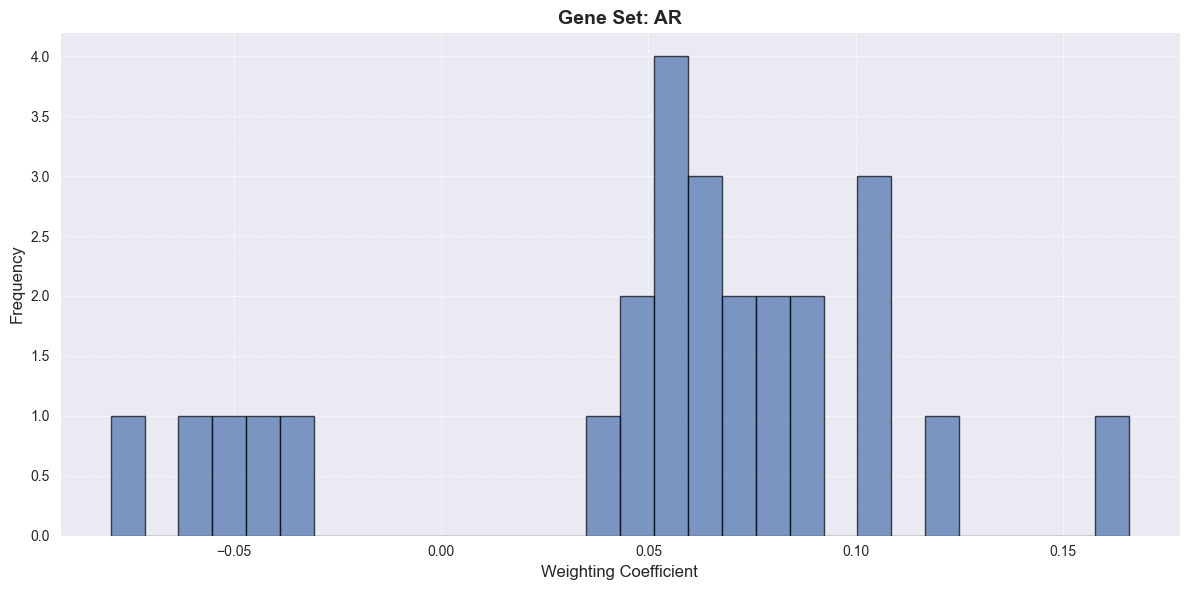

In [77]:
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, gene_set, cell_type, "AR", score="coef_mean", bins=30)

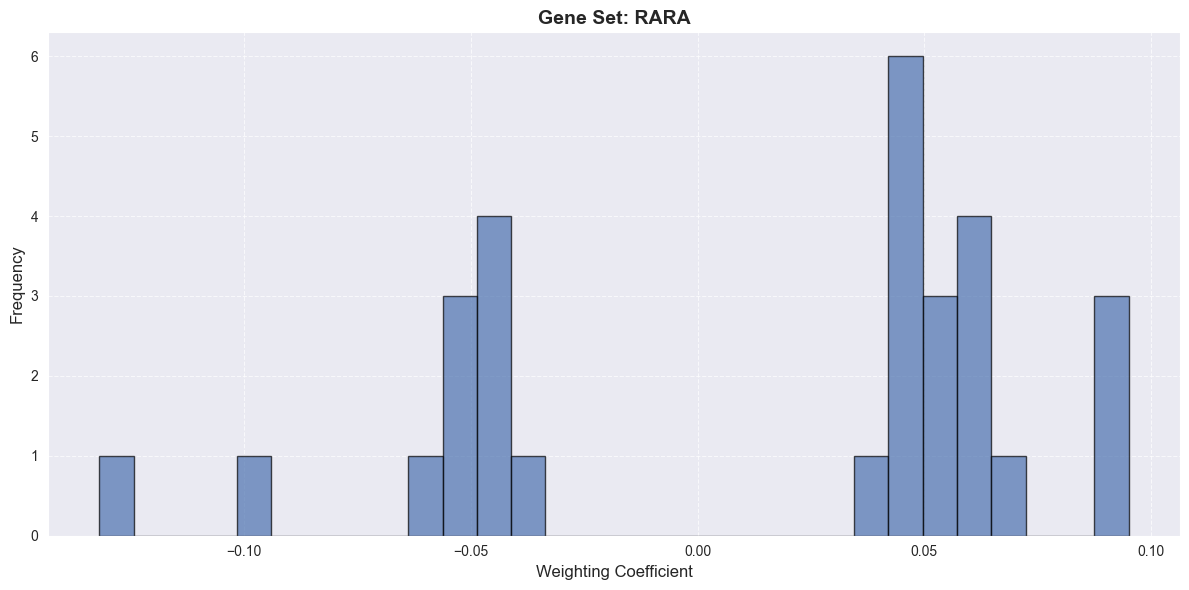

In [79]:
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, gene_set, cell_type, "RARA", score="coef_mean", bins=30)

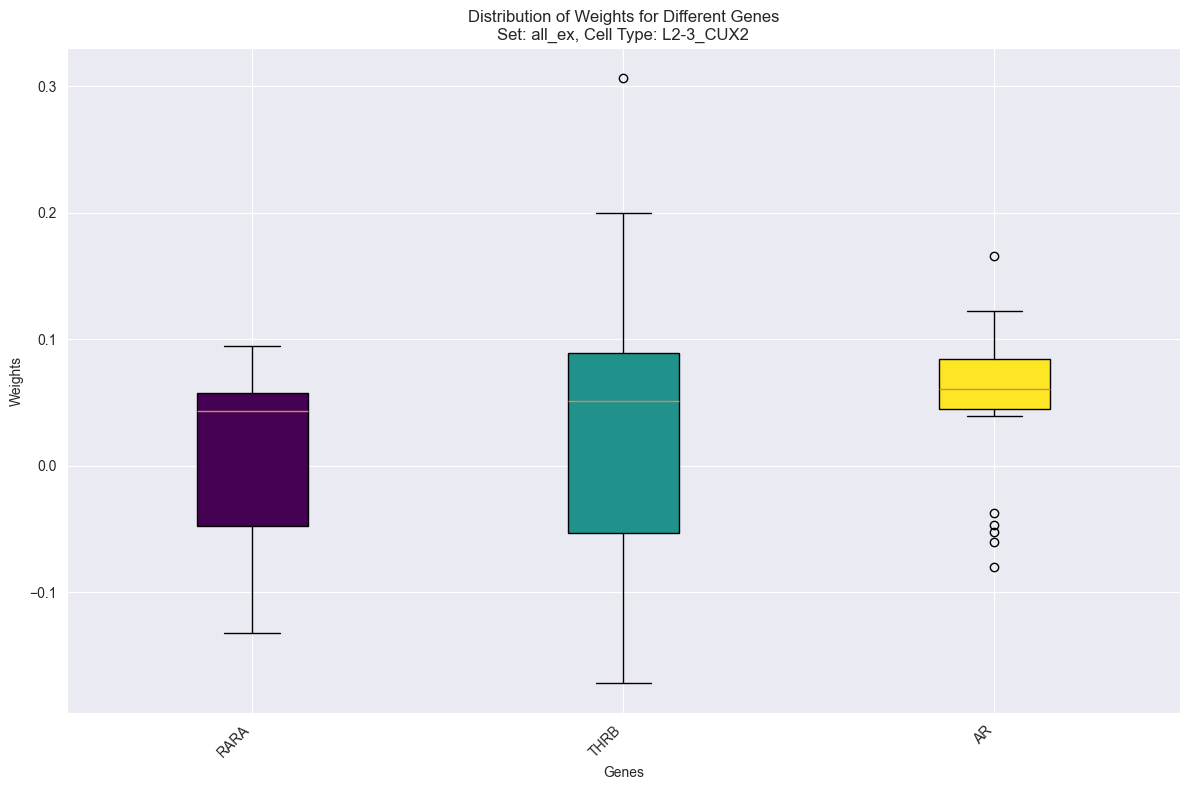

In [80]:
visualize_weight_distributions(gene_sets_dict_cell_type_first_celloracle, gene_set, cell_type, scored_genes, score_type="coef_mean")

### Intersections

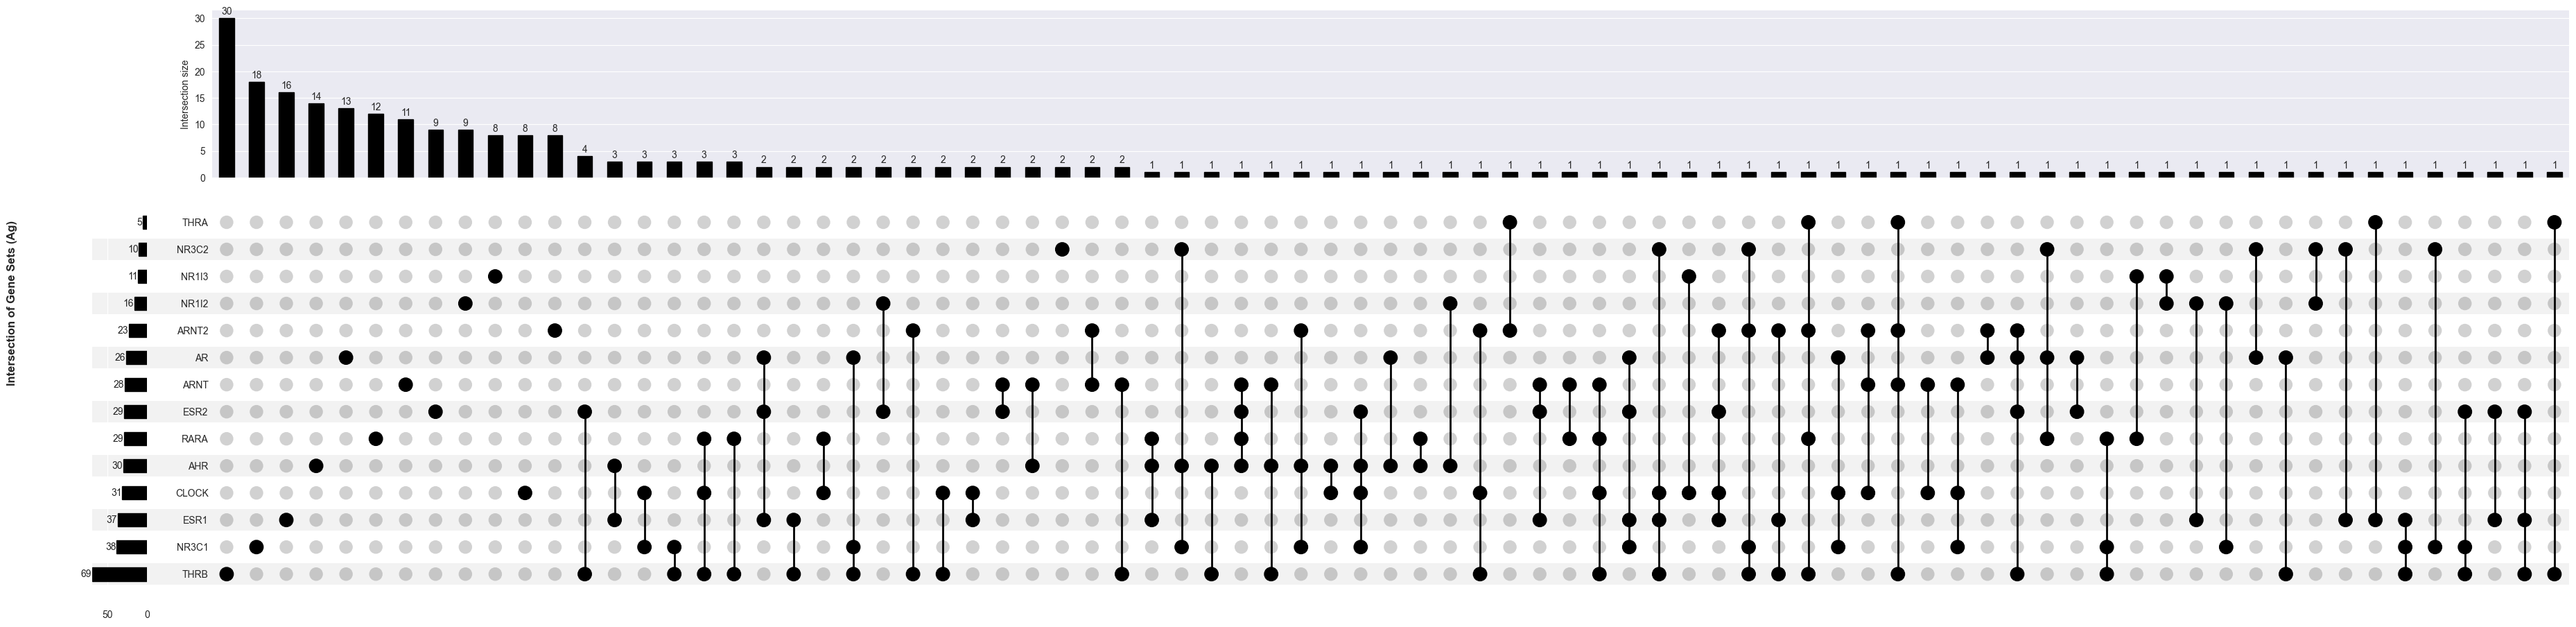

In [81]:
data={key: gene_sets_dict_cell_type_first_celloracle[gene_set][cell_type][key]["targets"] for key in gois}

plot_gene_set_intersections(data, title="Intersection of Gene Sets (Ag)")

### Histograms of the unique genes

Unique genes for each set:

L2-3_CUX2: {'SASH1', 'HTR1B', 'MICAL2', 'BCL9', 'RASGRF2'}

L4_RORB: {'GFRA1', 'RGS6', 'ATF5', 'GDF5', 'NCAM2', 'SESN3', 'FN1', 'KIF26B', 'NR4A3', 'PTPRZ1', 'TUBB2B', 'SOX5', 'BHLHE22', 'LINGO2'}

L5-6_THEMIS: {'HIST1H1E', 'COMMD3-BMI1', 'ETV5', 'TXNIP', 'CH25H', 'USP39', 'RARB', 'HIST1H2BN', 'LPL'}

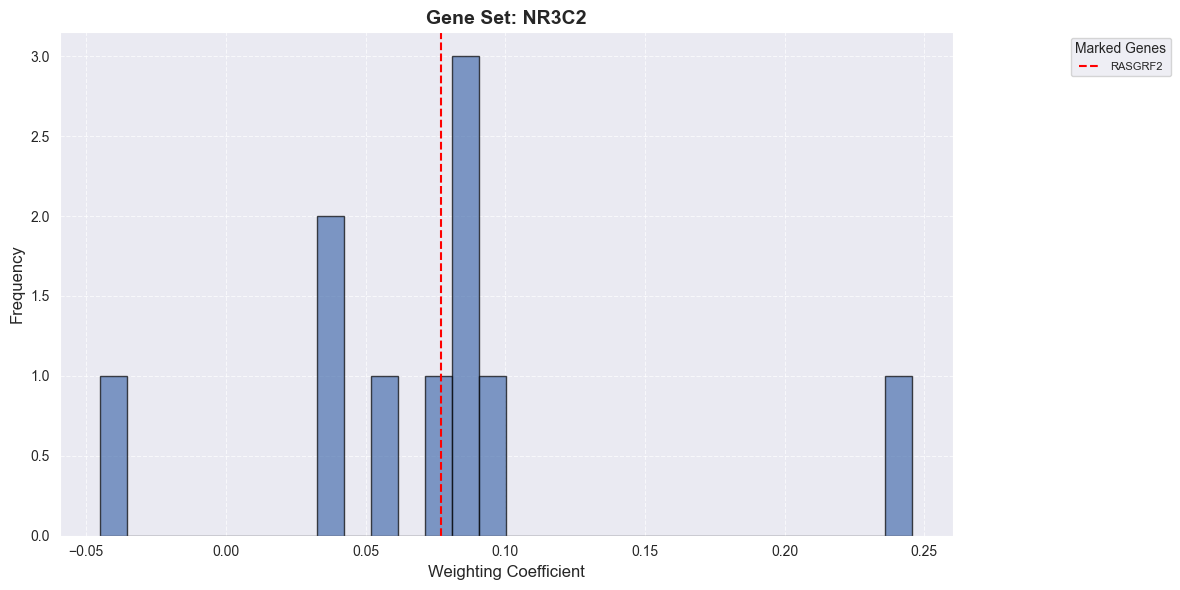

In [82]:
genes_to_mark = ['SASH1', 'HTR1B', 'MICAL2', 'BCL9', 'RASGRF2']
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, gene_set, "L2-3_CUX2", "NR3C2", score="coef_mean", bins=30, genes_to_mark=genes_to_mark)

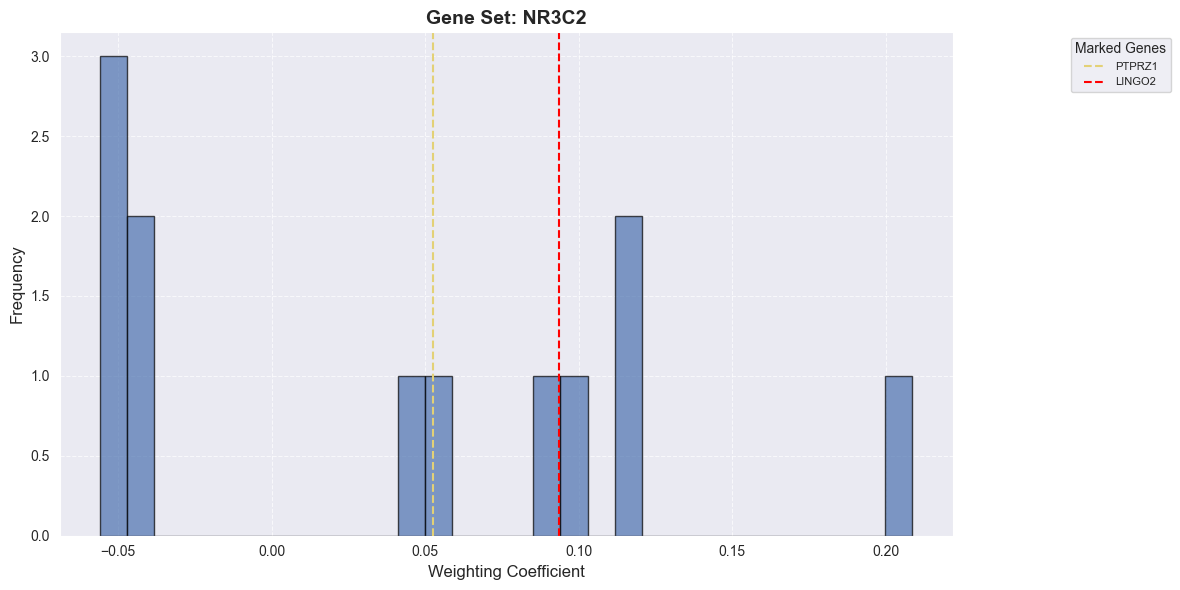

In [83]:
genes_to_mark = ['GFRA1', 'RGS6', 'ATF5', 'GDF5', 'NCAM2', 'SESN3', 'FN1', 'KIF26B', 'NR4A3', 'PTPRZ1', 'TUBB2B', 'SOX5', 'BHLHE22', 'LINGO2']
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, gene_set, "L4_RORB", "NR3C2", score="coef_mean", bins=30, genes_to_mark=genes_to_mark)

D:\Github/GeneScore/project_functions\evaluated_helpers.py:612: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Marked Genes", title_fontsize=10, fontsize=8, loc='upper right', bbox_to_anchor=(1.25, 1))


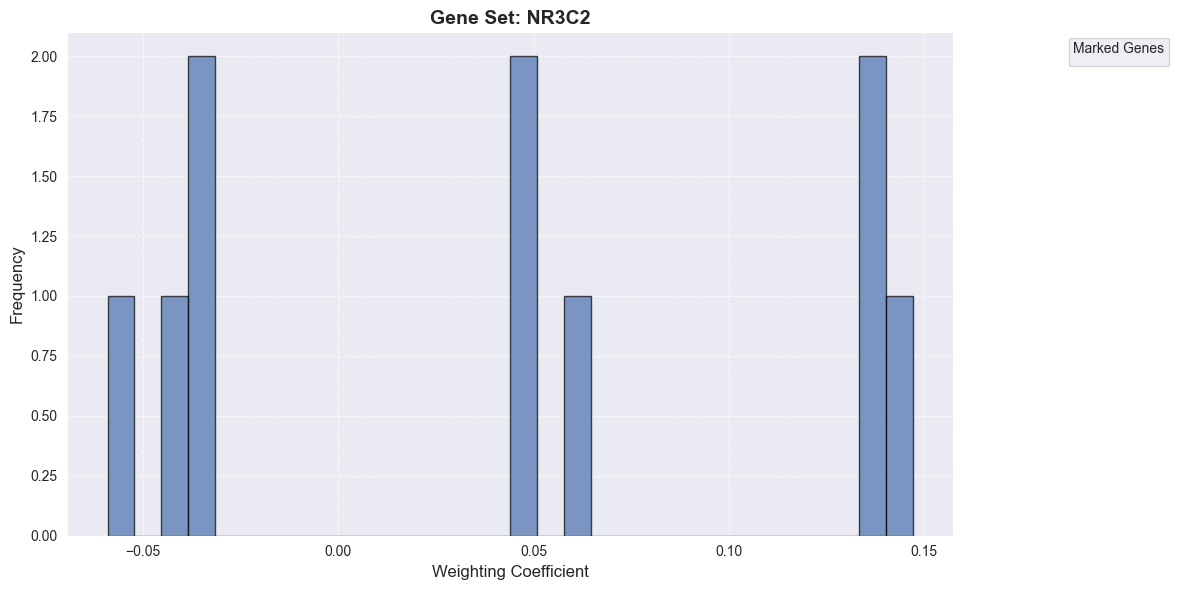

In [ ]:
genes_to_mark = ['HIST1H1E', 'COMMD3-BMI1', 'ETV5', 'TXNIP', 'CH25H', 'USP39', 'RARB', 'HIST1H2BN', 'LPL']
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, set_selected, "L5-6_THEMIS", "NR3C2", score="coef_mean", bins=30, genes_to_mark=genes_to_mark)